In [1]:
import sys
sys.path.append("/Users/jameskitchens/Documents/GitHub/terracotta")
import terracotta as tct
import importlib
importlib.reload(tct)

#tct.create_trees_files(
#    demes_path="demes.tsv",
#    samples_path="samples.tsv",
#    number_of_trees=10,
#    pop_size=500,
#    record_provenance=False,
#    migration_rate=0.01,
#    output_directory="different_trees_datasets"
#)

<module 'terracotta' from '/Users/jameskitchens/Documents/GitHub/terracotta/terracotta/__init__.py'>

In [2]:
import pandas as pd
import numpy as np
from glob import glob
import tskit
import sys
sys.path.append("/Users/jameskitchens/Documents/GitHub/terracotta")
import terracotta as tct
import importlib
importlib.reload(tct)
import time


directory = "."

demes = pd.read_csv(f"{directory}/demes.tsv", sep="\t")

demes["type"] = 0 #ignoring elevation type

samples = pd.read_csv(f"{directory}/samples.tsv", sep="\t")

world_map = tct.WorldMap(demes, samples)

In [2]:
trees = [tct.nx_bin_ts(tskit.load(ts).simplify(), [0, 10, 100, 1000, 1000, 10000, 100000, 1000000, 10000000]).first() for ts in glob(f"different_trees_datasets/500_0.01/*")]

In [3]:
def ancestors(tree, u):
    """Find all of the ancestors above a node for a tree

    Taken directly from https://github.com/tskit-dev/tskit/issues/2706

    Parameters
    ----------
    tree : tskit.Tree
    u : int
        The ID for the node of interest

    Returns
    -------
    An iterator over the ancestors of u in this tree
    """

    u = tree.parent(u)
    while u != -1:
         yield u
         u = tree.parent(u)

In [40]:
nwalkers = 5
niter = 1000
initial_mr = np.array([0.1 for connection_type in world_map.connections.type.unique()])
ndim = len(initial_mr)
p0 = [np.array(initial_mr) + 1e-2 * np.random.randn(ndim) for i in range(nwalkers)]
sampler, pos, prob, state = tct.mcmc.run(p0, nwalkers, niter, world_map, trees, save_to="mcmc_recorded.h5)

samples = sampler.flatchain
theta_max  = samples[np.argmax(sampler.flatlnprobability)]
print(theta_max)

Running burn-in...
[0.09804325] -5189.182468099959
[0.09675813] -5188.799388659753
[0.07947342] -5182.420348185946
[0.09820188] -5189.229074920959
[0.10158715] -5190.190255191381
[0.09275562] -5187.539159071066
[0.09929555] -5189.546483029532
[0.10275228] -5190.507105813238
[0.08632642] -5185.266931758808
[0.09788464] -5189.135718033748
[0.09965378] -5189.648989191042
[0.10218948] -5190.354905108523
[0.10089995] -5190.000132481746
[0.08979052] -5186.532715696938
[0.08938006] -5186.388022737985
[0.09294253] -5187.600421197683
[0.08269383] -5183.820370278124
[0.09758575] -5189.047220195635
[0.10556658] -5191.2454502148485
[0.10111356] -5190.059491416033
[0.09819497] -5189.227048391629
[0.08979151] -5186.533064348349
[0.10196244] -5190.293057842663
[0.09245951] -5187.441591214619
[0.08868095] -5186.138406568601
[0.08362267] -5184.202866121895
[0.10367954] -5190.754487990447
[0.06105247] -5171.278734716801
[0.09248163] -5187.448901360351
[0.10212655] -5190.337789990337
[0.10993157] -5192.3

Traceback (most recent call last):
  File "/opt/anaconda3/envs/terracotta/lib/python3.12/site-packages/emcee/ensemble.py", line 640, in __call__
    return self.f(x, *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jameskitchens/Documents/GitHub/terracotta/terracotta/mcmc.py", line 16, in lnprob
    prob = lp + calc_migration_rate_log_likelihood(
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jameskitchens/Documents/GitHub/terracotta/terracotta/main.py", line 351, in calc_migration_rate_log_likelihood
    log_likelihoods.append(_calc_tree_log_likelihood(tree, world_map.sample_location_vectors, precomputed_transitions=precomputed_transitions)[0])
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jameskitchens/Documents/GitHub/terracotta/terracotta/main.py", line 305, in _calc_tree_log_likelihood
    outgoing_log_message 

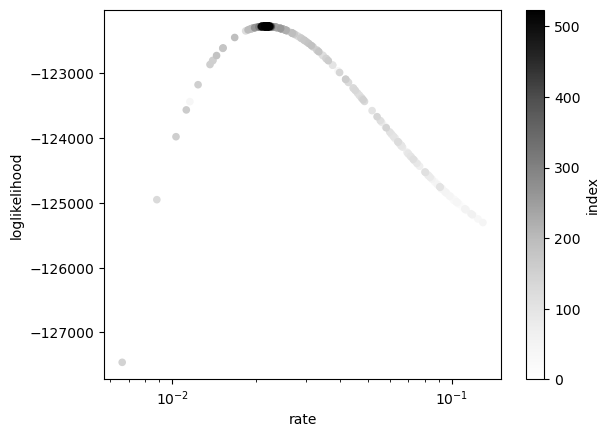

In [3]:
import matplotlib.pyplot as plt


#mcmc = pd.read_csv("mcmc_output_5_0.01.txt", sep=" ").loc[:,["rate", "loglikelihood"]].reset_index()
#mcmc.plot.scatter("rate", "loglikelihood", c="index")
#plt.xscale("log")
#plt.show()

#mcmc = pd.read_csv("mcmc_output_500_0.01.txt", sep=" ").loc[:,["rate", "loglikelihood"]].reset_index()
#mcmc.plot.scatter("rate", "loglikelihood", c="index")
#plt.xscale("log")
#plt.show()

mcmc = pd.read_csv("../better_mcmc/mcmc_output.txt", sep=" ").loc[:,["rate", "loglikelihood"]].reset_index()
mcmc.plot.scatter("rate", "loglikelihood", c="index")
plt.xscale("log")
plt.show()

In [6]:
mcmc.loc[mcmc["loglikelihood"]==mcmc["loglikelihood"].max()]

,index,rate,loglikelihood
424,424,0.021673,-122281.347625
